# PW6 Strom- und Spannungsquellen

*November 11, 2025*

---

## 1 : Solarzellen als Gleichstromquelle

### 1.1 Grundlagen und Angabe:

Eine Solarzelle wandelt Lichtenergie in elektrische Energie um. Sie basiert auf dem inneren Photoeffekt in einem Halbleiter, bei dem Elektronen durch Lichtenergie aus dem Valenzband in das Leitungsband übergehen. Dadurch kann der Halbleiter Strom leiten. Eine Solarzelle verhält sich elektrisch wie eine Diode, 
die bei Beleuchtung als Stromquelle mit parallel geschalteter Diode modelliert werden kann.

Das elektrische Ersatzschaltbild einer Solarzelle (siehe Abb.1) besteht aus einer Stromquelle (für den Lichtstrom $I_L$), 
einer Diode (innerer Verlust) und einem äußeren Widerstand $R_L$ (Verbraucher), die parallel geschaltet sind. 
Die Klemmenspannung ergibt sich nach dem Ohm’schen Gesetz zu:

$$
U_\text{ext} = R_L \cdot I_\text{ext}
$$

<div style="text-align: center;">
  <img src="SCHALTUNG.png" width="400">
  <p style="font-size:12px; color:black; text-align: center;"><b>Abb. 1:</b> Das elektrische Ersatzschaltbild einer Solarzelle </p>
</div>

Bei kleinen Lastwiderständen ($R_L \rightarrow 0$) fließt der gesamte Strom aus der Stromquelle, die Spannung ist fast null. Dieser Punkt wird als Kurzschlussstrom $I_{KS}$ bezeichnet.  Bei großen Lastwiderständen ($R_L \rightarrow \infty$) fließt kein Strom mehr, aber die Spannung erreicht ihr Maximum, die Leerlaufspannung $U_{LL}$.  
Beide Werte werden durch lineare Extrapolation der Strom-Spannungs-Kennlinie zu den Achsen bestimmt.  
Die Kennlinie verläuft zunächst fast konstant und fällt danach kontinuierlich ab (siehe Abb.2). 
In der Abbildung sind graue Rechtecke dargestellt, die die elektrische Leistung $P = U \cdot I$ für verschiedene $R_L$ zeigen.

<div style="text-align: center;">
  <img src="KENNLINIE.png" width="400">
  <p style="font-size:12px; color:black; text-align: center;"><b>Abb. 2:</b> Die Strom-Spannungs-Kennlinie </p>
</div>

Die größte nutzbare Leistung einer Solarzelle entspricht dem Produkt von Strom und Spannung im Arbeitspunkt mit der höchsten Leistung:

$$
P_\text{max} = U_\text{max} \cdot I_\text{max}
$$

Dieser Punkt beschreibt die maximal mögliche Leistung, die bei einem bestimmten Lastwiderstand $R_{L,\text{max}}$ erreicht wird.
Wie gut die Kennlinie einer idealen rechteckigen Form entspricht, wird durch den Kurvenfüllfaktor (CFF) beschrieben, definiert als:

$$
CFF = \frac{P_\text{max}}{I_{KS} \cdot U_{LL}}
$$

Der CFF ist also das Verhältnis der Fläche des Rechtecks mit maximaler Leistung zur Fläche des idealen Rechtecks aus $I_{KS}$ und $U_{LL}$.  Ein idealer Wert $CFF = 1$ entspräche einer perfekten Stufenkennlinie. Typische Solarzellen besitzen Werte zwischen $0.8$ und $0.9$.


### 1.2 Versuchsaufbau und Durchführung:
In dem Versuch wurde die Strom-Spannungskennlinie einer Solarzelle untersucht. Die Schaltung war gemäß Abbildung 3 aufgebaut. Die Solarzelle war als Spannungsquelle mit einer parallel geschalteten Diode dargestellt, und ein variabler Widerstand $R_L$ diente als Verbraucher. Zwei Voltmeter wurden verwendet: eines zur Messung der Spannung $U_R$ am bekannten Widerstand $R_1$ (zur indirekten Bestimmung des Stromes $I = U_R / R_1$) und ein zweites zur Messung der Klemmenspannung $U_\text{ext}$ der Solarzelle.

<div style="text-align: center;">
  <img src="AUFBAU.png" width="400">
  <p style="font-size:12px; color:black; text-align: center;"><b>Abb. 3:</b> Versuchaufbau </p>
</div>

Der Strom wurde nicht direkt mit einem Amperemeter gemessen, da dessen Innenwiderstand das Messergebnis verfälscht hätte. Stattdessen wurde der Strom aus der Spannung über den bekannten Messwiderstand $R_1 \approx 0{,}5\,\Omega$ berechnet.  
Die Solarzelle war auf einem höhenverstellbaren Träger montiert, wodurch der Abstand zwischen Solarzelle und Lampe variiert werden konnte, um unterschiedliche Beleuchtungsstärken zu erzeugen. 
Vor Beginn der Messung wurde die Lampe eingeschaltet und etwa 10–15 Minuten gewartet, bis ein stabiler Temperaturzustand erreicht war. 
Dann wurde der variable Widerstand schrittweise von einem kleinen bis zu einem großen Wert verändert, und für jede Einstellung wurden die Spannungen $U_R$ und $U_\text{ext}$ gemessen. Aus diesen Werten wurde anschließend der Strom $I$ berechnet.
Die Messungen wurden für zwei verschiedene Abstände zwischen Lampe und Solarzelle durchgeführt, um zwei unterschiedliche Beleuchtungsintensitäten zu untersuchen. Für jede Intensität wurden mehrere Messpunkte aufgenommen, sodass sowohl der Bereich des Kurzschlussstroms ($I_{KS}$) als auch der Bereich der Leerlaufspannung ($U_{LL}$) abgedeckt war.

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
# Measured data

# Measured voltage on constant resistor
U1_RI = np.array([0.02, 0.05, 0.08, 0.10, 0.12, 0.14]) #First light intensity
U2_RI = np.array([0.02, 0.05, 0.08, 0.10, 0.12, 0.14]) #Second light intensity

# Measured voltage at the solar panel terminals
U1_panel = np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1.0]) #First light intensity 
U2_panel = np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1.0]) #Second light intensity

# Known value of constant resistor connected in series
R_I = 0.5 

# Measured value of Rl 
Rl = np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])

In [8]:
# Indirectly measured data
I1 = np.array ([u / R_I for u in U1_RI]) # Current I1 in A, of first light intensity
P1 = [u * i for u, i in zip(U1_panel, I)]     # Power P1 in W, of first light intensity

I2 = np.array ([u / R_I for u in U2_RI]) # Current I2 in A, of second light intensity
P2 = [u * i for u, i in zip(U2_panel, I)]     # Power P2 in W, of second light intensity


print (f"The 1st Current is: {I1}")
print (f"The 2nd Current is: {I2}")
print (f"The 1st Power is: {P1}")
print (f"The 2nd Power is: {P2}")

The 1st Current is: [0.04 0.1  0.16 0.2  0.24 0.28]
The 2nd Current is: [0.04 0.1  0.16 0.2  0.24 0.28]
The 1st Power is: [0.004, 0.03, 0.08, 0.13999999999999999, 0.216, 0.28]
The 2nd Power is: [0.004, 0.03, 0.08, 0.13999999999999999, 0.216, 0.28]


In [12]:
#Calculating uncertainty of values

#Given uncertainty of measuring instruments

#Multimeter1 measured U on constant resistor
A1_percent = 0.5        # 0.5 %
B1_digits = 2           # ±2 digits
resolution1 = 0.01      # one step of the Multimeter1

U1_RI_uncertainty = (A1_percent / 100) * U1_RI + B1_digits * resolution1 #First light intensity
U2_RI_uncertainty = (A1_percent / 100) * U2_RI + B1_digits * resolution1 #Second light Intensity

#Multimeter2 measured U on panel
A2_percent = 0.5        # 0.5 %
B2_digits = 2           # ±2 digits
resolution2 = 0.01      # one step of the Multimeter2

U1_panel_uncertainty = (A2_percent / 100) * U1_panel + B2_digits * resolution2 #First light intensity
U2_panel_uncertainty = (A2_percent / 100) * U2_panel + B2_digits * resolution2 #Second light Intensity

#Given resistor values uncertainties
Rl_uncertainty = 0 #Changed resistor
R_I_uncertainty = 0 #Constant resistor

#Calcualting uncertainty indirectly with Gauss

#Defining general code for Gauss 

def gauss_fehlerfortpflanzung(formel, variablen, unsicherheiten, werte):

    expr = sp.sympify(formel)
    symbols = {v: sp.Symbol(v) for v in variablen}

    # Checking which elements are arrays
    array_vars = [v for v in variablen if isinstance(werte[v], (list, np.ndarray))]

    # If everything is skalar - regular counting
    if len(array_vars) == 0:
        subs_dict = {symbols[v]: float(werte[v]) for v in variablen}
        sigma_sq = 0
        for v in variablen:
            dfdv = sp.diff(expr, symbols[v])
            unc = float(unsicherheiten[v])
            sigma_sq += (dfdv.evalf(subs=subs_dict) * unc) ** 2
        return float(sp.sqrt(sigma_sq))

    # If there's at least one array - element counting
    n = len(werte[array_vars[0]])  
    sigma_ges = []

    for i in range(n):
        subs_dict = {}
        for v in variablen:
            val = werte[v][i] if isinstance(werte[v], (list, np.ndarray)) else werte[v]
            subs_dict[symbols[v]] = float(val)

        sigma_sq = 0
        for v in variablen:
            dfdv = sp.diff(expr, symbols[v])
            unc = (
                unsicherheiten[v][i]
                if isinstance(unsicherheiten[v], (list, np.ndarray))
                else unsicherheiten[v]
            )
            sigma_sq += (dfdv.evalf(subs=subs_dict) * float(unc)) ** 2

        sigma_ges.append(float(sp.sqrt(sigma_sq)))

    return np.array(sigma_ges)

#Calculating uncertainty indirectly

#Current in constant resistor with first light intencity
I1_uncertainty = gauss_fehlerfortpflanzung(
    formel='U1_RI / R_I',  
    variablen=['U1_RI', 'R_I'],
    unsicherheiten={'U1_RI': U1_RI_uncertainty, 'R_I': R_I_uncertainty},
    werte={'U1_RI':U1_RI, 'R_I':R_I}
)

#Current in constant resistor with second light intencity
I2_uncertainty = gauss_fehlerfortpflanzung(
    formel='U2_RI / R_I',  
    variablen=['U2_RI', 'R_I'],
    unsicherheiten={'U2_RI': U2_RI_uncertainty, 'R_I': R_I_uncertainty},
    werte={'U2_RI':U2_RI, 'R_I':R_I}
)

#Power in whole electricity cycle with first light intencity
P1_uncertainty = gauss_fehlerfortpflanzung(
    formel='U1_panel * I1',  
    variablen=['U1_panel', 'I1'],
    unsicherheiten={'U1_panel': U1_panel_uncertainty, 'I1': I1_uncertainty},
    werte={'U1_panel':U1_panel, 'I1':I1}
)

#Power in whole electricity cycle with second light intencity
P2_uncertainty = gauss_fehlerfortpflanzung(
    formel='U2_panel * I2',  
    variablen=['U2_panel', 'I2'],
    unsicherheiten={'U2_panel': U2_panel_uncertainty, 'I2': I2_uncertainty},
    werte={'U2_panel':U2_panel, 'I2':I2}
)

In [22]:
#Data view as tables

#Formating data with uncertainty
def format_with_unc(values, uncertainties):
    return [f"{v:.2f} ± {u:.2f}" for v, u in zip(values, uncertainties)]


#Creating a table for first light intencity
df1 = pd.DataFrame({
    f"Rl Variable resistor [Ω]±{Rl_uncertainty}": Rl,
    "U1_RI Voltage on constant resistor [V]": format_with_unc(U1_RI, U1_RI_uncertainty),
    "U1_panel Voltage on terminal [V]": format_with_unc(U1_panel, U1_panel_uncertainty),
    "I1 Current [A]": format_with_unc(I1, I1_uncertainty),
    "P1 Power [W]": format_with_unc(P1, P1_uncertainty)
})

print("\n Data Table for First Light Intensity\n")
print(df1)

#Creating a table for second light intencity
df2 = pd.DataFrame({
    f"Rl Variable resistor [Ω]±{Rl_uncertainty}": Rl,
    "U2_RI Voltage on constant resistor [V]": format_with_unc(U2_RI, U2_RI_uncertainty),
    "U2_panel Voltage on terminal [V]": format_with_unc(U2_panel, U2_panel_uncertainty),
    "I2 Current [A]": format_with_unc(I2, I2_uncertainty),
    "P2 Power [W]": format_with_unc(P2, P2_uncertainty)
})

print("\n Data Table for Second Light Intensity\n")
print(df2)


 Data Table for First Light Intensity

   Rl Variable resistor [Ω]±0 U1_RI Voltage on constant resistor [V]  \
0              0.1                          0.02 ± 0.02                
1              0.3                          0.05 ± 0.02                
2              0.5                          0.08 ± 0.02                
3              0.7                          0.10 ± 0.02                
4              0.9                          0.12 ± 0.02                
5              1.0                          0.14 ± 0.02                

  U1_panel Voltage on terminal [V] I1 Current [A] P1 Power [W]  
0            0.10 ± 0.02             0.04 ± 0.04   0.00 ± 0.00  
1            0.30 ± 0.02             0.10 ± 0.04   0.03 ± 0.01  
2            0.50 ± 0.02             0.16 ± 0.04   0.08 ± 0.02  
3            0.70 ± 0.02             0.20 ± 0.04   0.14 ± 0.03  
4            0.90 ± 0.02             0.24 ± 0.04   0.22 ± 0.04  
5            1.00 ± 0.03             0.28 ± 0.04   0.28 ± 0.04  


------------------------------------------------------------
Results for 'First Light Intensity':
  Short-circuit current (I_ks) = (0.1517 ± 0.0007) A
  Open-circuit voltage (U_ll)  = (0.966 ± 0.012) V
------------------------------------------------------------


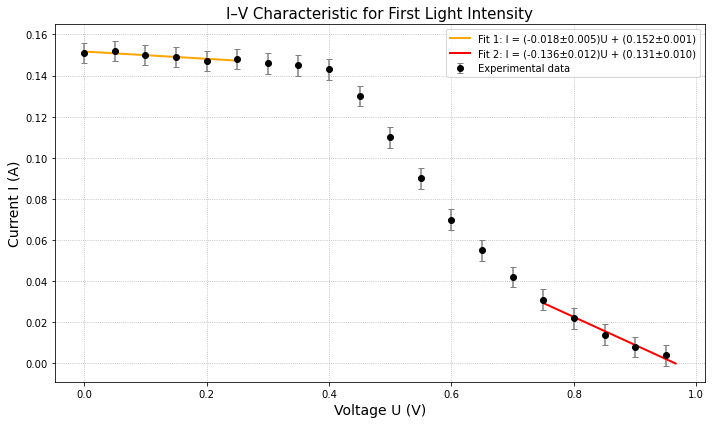

In [148]:
#Plotting U(I)
def linear_model(x, m, b):
    return m * x + b


def analyze_and_plot_iv_curve(u_data, i_data, dataset_name, threshold1, threshold2, fit_color1, fit_color2):
    # DIvide data into two regions
    mask1 = u_data < threshold1
    u1_fit_data, i1_fit_data = u_data[mask1], i_data[mask1]

    mask2 = u_data > threshold2
    u2_fit_data, i2_fit_data = u_data[mask2], i_data[mask2]

    # Linear approximations
    popt1, pcov1 = curve_fit(linear_model, u1_fit_data, i1_fit_data)
    m1, b1 = popt1
    delta_m1, delta_b1 = np.sqrt(np.diag(pcov1))

    popt2, pcov2 = curve_fit(linear_model, u2_fit_data, i2_fit_data)
    m2, b2 = popt2
    delta_m2, delta_b2 = np.sqrt(np.diag(pcov2))

    #Finding Iks and Ull
    I_ks = b1
    delta_I_ks = delta_b1

    U_ll = -b2 / m2
    cov_m2_b2 = pcov2[0, 1]
    delta_U_ll = abs(U_ll) * np.sqrt((delta_b2/b2)**2 + (delta_m2/m2)**2 - 2*cov_m2_b2/(m2*b2))

    #Printing results
    print("-" * 60)
    print(f"Results for '{dataset_name}':")
    print(f"  Short-circuit current (I_ks) = ({I_ks:.4f} ± {delta_I_ks:.4f}) A")
    print(f"  Open-circuit voltage (U_ll)  = ({U_ll:.3f} ± {delta_U_ll:.3f}) V")
    print("-" * 60)

    #Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(u_data, i_data, yerr=I1_uncertainty, fmt='o', color='black',
                ecolor='gray', capsize=3, label='Experimental data')

    # First approximation with small Rl
    u_line1 = np.linspace(0, np.max(u1_fit_data), 100)
    i_line1 = linear_model(u_line1, m1, b1)
    ax.plot(u_line1, i_line1, color=fit_color1, lw=2,
            label=f'Fit 1: I = ({m1:.3f}±{delta_m1:.3f})U + ({b1:.3f}±{delta_b1:.3f})')

    # Second approximation with large Rl
    u_line2 = np.linspace(np.min(u2_fit_data), U_ll, 100)
    i_line2 = linear_model(u_line2, m2, b2)
    ax.plot(u_line2, i_line2, color=fit_color2, lw=2,
            label=f'Fit 2: I = ({m2:.3f}±{delta_m2:.3f})U + ({b2:.3f}±{delta_b2:.3f})')
    
    #Axes
    ax.set_xlabel("Voltage U (V)", fontsize=14)
    ax.set_ylabel("Current I (A)", fontsize=14)
    ax.set_title(f"I–V Characteristic for {dataset_name}", fontsize=15)
    ax.legend(fontsize=10, loc="best")
    ax.grid(True, linestyle=":")
    plt.tight_layout()
    plt.show()
    
    # Return calculated parameters
    return I_ks, delta_I_ks, U_ll, delta_U_ll


#Calling a function fot 1st intencity
I_ks1, dI_ks1, U_ll1, dU_ll1 = analyze_and_plot_iv_curve(
    u_data=U1_panel,
    i_data=I1,
    dataset_name="First Light Intensity",
    threshold1=0.3, # Region of constant current (ADJUSTING DURING EXPIREMENT!)
    threshold2=0.7, # Region of constant current (ADJUSTING DURING EXPIREMENT!)
    fit_color1='orange',
    fit_color2='red'
)

In [149]:
#Calling a function fot 2nd intencity
I_ks2, dI_ks2, U_ll2, dU_ll2 = analyze_and_plot_iv_curve(
    u_data=U2_panel,
    i_data=I2,
    dataset_name="Second Light Intensity",
    threshold1=0.3,  # Region of constant current (ADJUSTING DURING EXPIREMENT!)
    threshold2=0.7,  # Region of smoothly falling current (ADJUSTING DURING EXPIREMENT!)
    fit_color1='orange',
    fit_color2='red'
)

TypeError: Improper input: N=2 must not exceed M=1

In [ ]:
# Polynom regression calculation using numpy's polyfit (2te degree polynomial) FOR 1ST LIGHT INTENCITY
a1, b1, c1 = np.polyfit(Rl, P1, 2)   
(coefs, cov) = np.polyfit(Rl, P1, 2, cov=True) #covariance 
a1, b1, c1 = coefs
P_fit = np.polyval(coefs, Rl)

# Uncertainties from covariance matrix
sigma_a1, sigma_b1, sigma_c1 = np.sqrt(np.diag(cov))

# Chi²/dof 
chi2 = np.sum((P1 - P_fit)**2)
dof = len(P1) - 3
chi2_dof = chi2 / dof

# Output the fit from graph
print(f"Polynom fit model: P = {a1: .4f}Rl^2 + {b1: .4f}Rl + {c1: .4f}")
print(f"chi2/dof = {chi2_dof:.6f}")

# Output physical values
print(f"Quadratic coefficient: {a1:.4f} ± {sigma_a1:.4f}")
print(f"Linear coefficient): {b1:.4f} ± {sigma_b1:.4f}")
print(f"Constant term): {c1:.4f} ± {sigma_c1:.4f}")


# Plot the data and the fitted line with higher resolution and custom label sizes
plt.figure(figsize=(10, 6), dpi=200)  # Increase figure size and resolution (DPI)
plt.scatter(Rl, P1, color='blue', label='Data points')  # Scatter plot of the data points
plt.plot(Rl, P_fit, color='red', label=f'Fitted line: P = {a1: .4f}Rl^2 + {b1: .4f}Rl + {c1: .4f}')  # Line of best fit
plt.xlabel('Resistance Rl [Ω]', fontsize=28)  # Label x-axis with custom font size
plt.ylabel('Power P1 [W]', fontsize=28)  # Label y-axis with custom font size
plt.title('Power P1 as Function of changing resistor RL', fontsize=32)  # Title with custom font size
plt.legend(fontsize=10, loc='upper left')  # Legend with custom font size
plt.grid(True)
plt.show()

In [ ]:
# Polynom regression calculation using numpy's polyfit (2te degree polynomial) FOR 1ST LIGHT INTENCITY
a2, b2, c2 = np.polyfit(Rl, P2, 2)   
(coefs, cov) = np.polyfit(Rl, P2, 2, cov=True) #covariance 
a2, b2, c2 = coefs
P_fit = np.polyval(coefs, Rl)

# Uncertainties from covariance matrix
sigma_a2, sigma_b2, sigma_c2 = np.sqrt(np.diag(cov))

# Chi²/dof 
chi2 = np.sum((P2 - P_fit)**2)
dof = len(P2) - 3
chi2_dof = chi2 / dof

# Output the fit from graph
print(f"Polynom fit model: P = {a2: .4f}Rl^2 + {b2: .4f}Rl + {c2: .4f}")
print(f"chi2/dof = {chi2_dof:.6f}")

# Output physical values
print(f"Quadratic coefficient: {a2:.4f} ± {sigma_a2:.4f}")
print(f"Linear coefficient): {b2:.4f} ± {sigma_b2:.4f}")
print(f"Constant term): {c2:.4f} ± {sigma_c2:.4f}")


# Plot the data and the fitted line with higher resolution and custom label sizes
plt.figure(figsize=(10, 6), dpi=200)  # Increase figure size and resolution (DPI)
plt.scatter(Rl, P2, color='blue', label='Data points')  # Scatter plot of the data points
plt.plot(Rl, P_fit, color='red', label=f'Fitted line: P = {a2: .4f}Rl^2 + {b2: .4f}Rl + {c2: .4f}')  # Line of best fit
plt.xlabel('Resistance Rl [Ω]', fontsize=28)  # Label x-axis with custom font size
plt.ylabel('Power P2 [W]', fontsize=28)  # Label y-axis with custom font size
plt.title('Power P2 as Function of changing resistor RL', fontsize=32)  # Title with custom font size
plt.legend(fontsize=10, loc='upper left')  # Legend with custom font size
plt.grid(True)
plt.show()

In [ ]:
#Function that finds a maximum value of Power
def find_pmax_quadratic(a, b, c):
    if a == 0:
        raise ValueError("Koefficient shouldn't be equal 0")

    R_max = -b / (2 * a)
    P_max = a * R_max**2 + b * R_max + c
    return R_max, P_max


#First Light Intencity maximal Power
R1_max, P1_max = find_pmax_quadratic(a1, b1, c1)

#Uncertainties with Gauss 1st Intencity
R1_max_uncertainty = gauss_fehlerfortpflanzung(
    formel='-b1 / (2 * a1)',  
    variablen=['a1', 'b1'],
    unsicherheiten={'sigma_a1': sigma_a1, 'sigma_b1': sigma_b1},
    werte={'a1':a1, 'b1':b1}
)

P1_max_uncertainty = gauss_fehlerfortpflanzung(
    formel='a1 * R1_max**2 + b1 * R1_max + c1',  
    variablen=['a1', 'b1', 'c1', 'R1_max'],
    unsicherheiten={'sigma_a1': sigma_a1, 'sigma_b1': sigma_b1, 'sigma_c1': sigma_c1, 'R1_max_uncertainty': R1_max_uncertainty},
    werte={'a1':a1, 'b1':b1, 'c1':c1, 'R1_max': R1_max}
)

print(f"Maximum power at Rl = ({R1_max:.3f}±{R1_max_uncertainty:.3f}) Ω")'
print(f"P1_max = ({P1_max:.4f}±{P1_max_uncertainty:.3f}) W")



#Second Light Intencity maximal Power
R2_max, P2_max = find_pmax_quadratic(a2, b2, c2)

#Uncertainties with Gauss 2nd Intencity
R2_max_uncertainty = gauss_fehlerfortpflanzung(
    formel='-b2 / (2 * a2)',  
    variablen=['a2', 'b2'],
    unsicherheiten={'sigma_a2': sigma_a2, 'sigma_b2': sigma_b2},
    werte={'a2':a2, 'b2':b2}
)

P2_max_uncertainty = gauss_fehlerfortpflanzung(
    formel='a2 * R2_max**2 + b2 * R2_max + c2',  
    variablen=['a2', 'b2', 'c2', 'R2_max'],
    unsicherheiten={'sigma_a2': sigma_a2, 'sigma_b2': sigma_b2, 'sigma_c2': sigma_c2, 'R2_max_uncertainty': R2_max_uncertainty},
    werte={'a2':a2, 'b2':b2, 'c2':c2, 'R2_max': R2_max}
)

print(f"Maximum power at Rl = ({R2_max:.3f}±{R2_max_uncertainty:.3f}) Ω")'
print(f"P2_max = ({P2_max:.4f}±{P2_max_uncertainty:.3f}) W")


In [ ]:
#Finding Сurve Fill Factor
def calculate_cff(P_max, I_KS, U_LL):
    if I_KS == 0 or U_LL == 0:
        raise ValueError("I_KS and U_LL must be nonzero to calculate CFF.")
    cff = P_max / (I_KS * U_LL)
    return cff

dI_ks1, U_ll1, dU_ll1 

#First light intencity CFF
CFF1 = calculate_cff (P1_max, I_ks1, U_ll1)
CFF1_uncertainty = gauss_fehlerfortpflanzung(
    formel='P1_max / (I_ks1 * U_ll1)',  
    variablen=['P1_max', 'I_ks1', 'U_ll1'],
    unsicherheiten={'P1_max_uncertainty': P1_max_uncertainty, 'dI_ks1': dI_ks1, 'dU_ll1': dU_ll1},
    werte={'P1_max': P1_max, 'I_ks1': I_ks1, 'U_ll1': U_ll1}
)

print (f"The curve fill factor for 1st light intencity is: ({CFF1:.3f}±{CFF1_uncertainty:.3f}) ")

#Second light intencity CFF
CFF2 = calculate_cff (P2_max, I_ks2, U_ll2)
CFF2_uncertainty = gauss_fehlerfortpflanzung(
    formel='P2_max / (I_ks2 * U_ll2)',  
    variablen=['P2_max', 'I_ks2', 'U_ll2'],
    unsicherheiten={'P2_max_uncertainty': P2_max_uncertainty, 'dI_ks2': dI_ks2, 'dU_ll2': dU_ll2},
    werte={'P2_max': P2_max, 'I_ks2': I_ks2, 'U_ll2': U_ll2}
)

print (f"The curve fill factor for 2nd light intencity is: {CFF2:.3f}±{CFF2_uncertainty:.3f})")